<a href="https://colab.research.google.com/github/19marquee/rabbit-challenge/blob/main/deep-learning-2/day3section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# レポート 深層学習day3/Section1:再帰型ニューラルネットワークの概念


## 100文字以内の要点のまとめ

- RNN(Reccurent Neural Network)：時系列データ（音声データ、株価データ、テキストデータ等）に対応可能なニューラルネットワーク。
- 特徴として、再帰的構造がネットワークの中に組み込まれている。時系列モデルを扱うには、初期の状態と過去の状態を保持し、そこから未来の時間での状態を再帰的に求める再帰構造が必要になる。
- BPTT(Back Propagation Through Time)：RNNにおいてのパラメータ調整方法の一種である。

##実装演習結果

#### 準備

#### Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code')

#### simple RNN
#### バイナリ加算

iters:0
Loss:1.1209201112495144
Pred:[0 0 1 0 0 0 0 1]
True:[0 1 0 0 1 1 0 1]
60 + 17 = 33
------------
iters:100
Loss:1.1414693137476073
Pred:[1 1 1 1 0 1 1 1]
True:[1 0 0 0 0 1 0 0]
25 + 107 = 247
------------
iters:200
Loss:0.975105962208904
Pred:[0 1 0 0 0 0 0 1]
True:[0 1 1 1 0 1 1 1]
63 + 56 = 65
------------
iters:300
Loss:1.0155143255594645
Pred:[0 0 1 1 0 0 1 1]
True:[1 0 0 0 0 1 0 0]
75 + 57 = 51
------------
iters:400
Loss:0.815440127459479
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 0 0 0 1 0]
13 + 117 = 0
------------
iters:500
Loss:1.1398375465502932
Pred:[0 1 0 1 1 1 0 1]
True:[1 0 1 0 0 0 0 0]
44 + 116 = 93
------------
iters:600
Loss:1.0025756338310345
Pred:[1 1 0 1 0 1 0 1]
True:[1 1 1 0 1 0 0 1]
126 + 107 = 213
------------
iters:700
Loss:1.0594513569889403
Pred:[1 1 1 0 0 1 1 1]
True:[1 0 0 0 1 0 0 1]
55 + 82 = 231
------------
iters:800
Loss:0.8309702061956636
Pred:[1 1 1 0 1 1 1 1]
True:[0 1 1 0 1 1 1 0]
24 + 86 = 239
------------
iters:900
Loss:0.8742580012317562
Pred:[0 

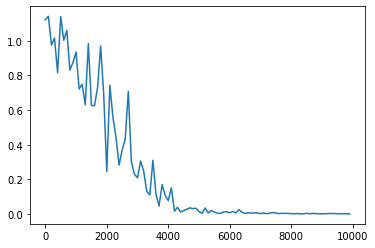

In [3]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### [try] weight_init_stdやlearning_rate, hidden_layer_sizeを変更してみよう




#### [try] 重みの初期化方法を変更してみよう
Xavier, He



#### [try] 中間層の活性化関数を変更してみよう
ReLU(勾配爆発を確認しよう)<br>
tanh(numpyにtanhが用意されている。導関数をd_tanhとして作成しよう)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

活性化関数をReLUに変更して学習

iters:0
Loss:33.9284010712878
Pred:[0 0 0 0 0 8 0 5]
True:[0 1 0 1 0 1 0 1]
48 + 37 = 37
------------
iters:100
Loss:2.0
Pred:[0 0 0 0 0 0 0 0]
True:[1 1 1 0 0 1 0 0]
102 + 126 = 0
------------
iters:200
Loss:2.0
Pred:[0 0 0 0 0 0 0 0]
True:[1 1 0 0 1 0 0 1]
106 + 95 = 0
------------
iters:300
Loss:2.5
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 0 1 1 1 0]
9 + 101 = 0
------------
iters:400
Loss:2.0
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 0 0 0 1 1 1]
34 + 37 = 0
------------
iters:500
Loss:2.0
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 0 0 1 1 1]
96 + 39 = 0
------------
iters:600
Loss:3.5
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 1 1 1 1 1]
110 + 17 = 0
------------
iters:700
Loss:2.5
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 1 1 1 0 0]
45 + 79 = 0
------------
iters:800
Loss:2.5
Pred:[0 0 0 0 0 0 0 0]
True:[1 1 0 0 0 1 1 1]
91 + 108 = 0
------------
iters:900
Loss:3.0
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 1 1 0 1 1 1]
104 + 79 = 0
------------
iters:1000
Loss:2.0
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 0 1 0 1 0]
13 + 93 = 0
----

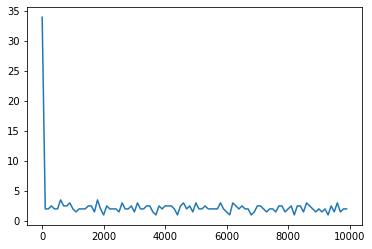

In [6]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def d_tanh(x):
  sinh = (np.exp(x) - np.exp(-x)) / 2
  cosh = (np.exp(x) + np.exp(-x)) / 2
  return (cosh**2 - sinh**2) / cosh**2

# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier
# W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size))
# W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size))
# W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size))

# He
# W_in = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size) * np.sqrt(2)
# W_out = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)
# W = np.random.randn(hidden_layer_size, hidden_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)


# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        # z[:,t+1] = functions.sigmoid(u[:,t+1])
        z[:,t+1] = functions.relu(u[:,t+1])

        # y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))
        y[:,t] = functions.relu(np.dot(z[:,t+1].reshape(1, -1), W_out))

        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        # delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_relu(y[:,t])    

        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        # delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])
        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_relu(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

重み初期値設定方法をXavierに変更、d_tanh作成して適用して学習

iters:0
Loss:2.5949381110458636
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 0 1 1 0 1]
100 + 41 = 0
------------
iters:100
Loss:1.0664171289970337
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 1 0 0 0 1 1]
105 + 58 = 255
------------
iters:200
Loss:1.0791476353592055
Pred:[0 1 1 1 1 1 0 1]
True:[1 0 1 0 0 1 0 1]
105 + 60 = 125
------------
iters:300
Loss:1.0828378314082672
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 1 1 1 0 0 0]
67 + 117 = 255
------------
iters:400
Loss:0.5653797305393824
Pred:[0 1 1 0 0 0 0 0]
True:[0 1 1 0 0 1 0 0]
95 + 5 = 96
------------
iters:500
Loss:0.6828214525408597
Pred:[1 1 1 1 1 1 1 0]
True:[1 0 1 0 1 1 1 0]
127 + 47 = 254
------------
iters:600
Loss:0.27362662637629
Pred:[0 1 0 1 1 0 0 0]
True:[0 1 0 1 1 0 0 0]
18 + 70 = 88
------------
iters:700
Loss:0.8190990859897671
Pred:[1 1 1 0 1 1 0 0]
True:[1 1 1 1 0 0 0 0]
123 + 117 = 236
------------
iters:800
Loss:0.11124905086579814
Pred:[1 1 0 0 0 0 1 0]
True:[1 1 0 0 0 0 1 0]
108 + 86 = 194
------------
iters:900
Loss:0.46200459991798615
Pr

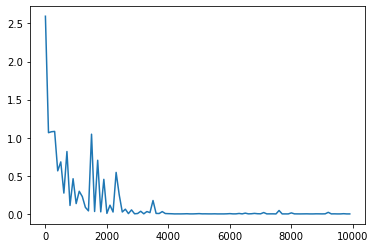

In [5]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def d_tanh(x):
  sinh = (np.exp(x) - np.exp(-x)) / 2
  cosh = (np.exp(x) + np.exp(-x)) / 2
  return (cosh**2 - sinh**2) / cosh**2

# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier
W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size))
W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size))
W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size))

# He
#W_in = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size) * np.sqrt(2)
#W_out = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)
#W = np.random.randn(hidden_layer_size, hidden_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)


# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        # z[:,t+1] = functions.sigmoid(u[:,t+1])
        z[:,t+1] = np.tanh(u[:,t+1])

        # y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))
        y[:,t] = np.tanh(np.dot(z[:,t+1].reshape(1, -1), W_out))

        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        # delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * d_tanh(y[:,t])    

        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        # delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])
        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_tanh(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

学習が安定し、収束することを確認。

##確認テスト

・RNNのネットワークには大きくわけて3つの重みがある。1つは入力から現在の中間層を定義する際にかけられる重み、1つは中間層から出力を定義する際にかけられる重みである。  
残り1つの重みについて説明せよ。

解答  

中間層から中間層へ至るところ（再帰的な部分）の重み。前の中間層からの重み。

・連鎖率の原理を使い、dz/dx を求めよ。  

$$z = t^2$$
$$t = x + y$$

解答  
$\dfrac{dz}{dx} = \dfrac{dz}{dt} \dfrac{dt}{dx}$  

$\dfrac{dz}{dt} = 2t$,　$\dfrac{dt}{dx} = 1$より、  

$\dfrac{dz}{dx} = 2t*1 = 2t = 2(x+y)$

・下図の$y_1$を$x, z_0, z_1, w_{in}, w, w_{out}$を用いて数式で表せ。※バイアスは任意の文字で定義せよ。※また中間層の出力にシグモイド関数$g(x)$を作用させよ。  

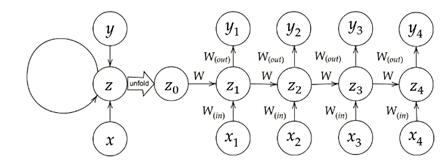

解答  
$$z_1 = f(w_{in}*x_1+w*z_0+b)$$
$$y_1 = g(w_{out}*z_1+c)$$